In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dpks.interpretation import BootstrapInterpreter

from sklearn.datasets import make_classification

In [2]:
from dpks.quant_matrix import QuantMatrix

import pandas as pd
import numpy as np

In [3]:
design_matrix = pd.read_csv(
    #"../tests/input_files/design_sepsis.tsv",
    "/home/aaron/projects/dpks/notebooks/ml_api/covid_design_matrix.tsv",
    sep="\t"
)

In [4]:
design_matrix = design_matrix.sort_values("group", ascending=False).reset_index(drop=True)

In [5]:
#design_matrix['sample_num'] = design_matrix.index.values

Now, we simulate 3 groups in the data so we can perform multiple rounds of explanations

In [6]:
# design_matrix['group'] = np.where(
#     design_matrix['sample_num'] < 50, 3, design_matrix['group']
# )

In [7]:
design_matrix['group'].value_counts()

group
2    406
1    281
Name: count, dtype: int64

In [8]:
qm = QuantMatrix(
    quantification_file="/home/aaron/projects/dpks/notebooks/ml_api/quantified_proteins.tsv", #../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
)#.impute(method="uniform_percentile", percentile=0.1)
# ).filter().normalize(
#         method="mean",
#         use_rt_sliding_window_filter=True,
#         rt_unit="second",
#         stride=5,
#         minimum_data_points=200,
#     ).quantify(method="maxlfq", top_n=5)

In [9]:
qm.to_df()

,Protein,20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_567_ZeBanC_P6_B9,20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_242_ZeBanc2_P3_D3,20200520_TOF1_AF_561_ZeBanC_P6_A9,20200520_TOF1_AF_560_ZeBanC_P6_A8,20200710_TOF1_LS_243_ZeBanc2_P2_B10,...,20200520_TOF1_AF_480_ZeBanC_P4_D4,20200520_TOF1_AF_479_ZeBanC_P4_D3,20200520_TOF1_AF_477_ZeBanC_P4_D2,20200520_TOF1_AF_473_ZeBanC_P4_C10,20200520_TOF1_AF_470_ZeBanC_P4_C8,20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_452_ZeBanC_P4_B6,20200710_TOF1_LS_478_ZeBanc2_P3_C2
0,P00747,6.369558,6.273480,6.986697,6.515837,5.695563,6.356513,7.004830,6.356030,5.910256,...,6.468140,6.453261,6.571446,6.681331,6.671234,6.622158,6.412603,6.805669,6.783759,6.550999
1,P02787,8.401196,8.880733,8.507033,8.520859,7.735718,8.295316,7.937633,8.426938,8.223306,...,8.530269,8.230319,8.321719,8.615886,8.624988,8.288215,8.365201,8.738553,8.568250,8.988438
2,P02675,9.841766,8.345927,8.950592,9.161668,9.527870,8.154696,8.627954,8.936483,8.133183,...,8.038910,9.749433,8.914521,8.701449,8.196697,8.782215,8.099411,8.209688,8.478864,7.690843
3,P01024,6.893714,7.805909,8.229213,8.362354,7.758402,8.140939,8.292043,8.141514,6.856413,...,8.218407,7.375825,7.833996,8.032924,7.923644,8.120836,8.518470,7.929849,8.055062,7.735543
4,P13671,4.900842,5.044468,5.596706,5.146233,4.364944,4.937289,5.675970,5.132487,5.044829,...,4.958072,4.358831,4.729202,5.025295,5.066806,5.272335,5.423808,4.548170,5.426075,5.013546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,P04264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,O95497,NaN,NaN,NaN,NaN,4.721399,NaN,NaN,NaN,NaN,...,3.952255,NaN,NaN,NaN,4.139811,NaN,NaN,NaN,NaN,NaN
186,P01767,8.050850,8.525077,8.029250,NaN,NaN,NaN,NaN,8.560614,NaN,...,8.260549,8.294685,NaN,8.084459,NaN,8.315475,NaN,8.301903,NaN,NaN
187,P30041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
qm_decoys_added = qm.append(
    method="shuffle",
    feature_column="Protein"
)

In [11]:
qm_decoys_added.sample_annotations

,sample,WHO grade,group
sample,,,
20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_002_ZeBanC_P1_A1,7,2
20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_545_ZeBanC_P4_H9,6,2
20200520_TOF1_AF_567_ZeBanC_P6_B9,20200520_TOF1_AF_567_ZeBanC_P6_B9,6,2
20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_239_ZeBanc2_P1_C12,7,2
20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_240_ZeBanc2_P3_H1,7,2
...,...,...,...
20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_468_ZeBanC_P4_C6,4,1
20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_460_ZeBanC_P4_B12,4,1
20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_454_ZeBanC_P4_B7,3,1


In [12]:
qm_decoys_added = qm_decoys_added.compare(
    method="linregress",
    min_samples_per_group=2,
    comparisons=[(2, 1)]
)

In [13]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P00747,0,0.041350,6.446830,6.507135,0.327546,0.281935,-0.060304,1.245620e-02,406,281,2.840887e-02,1.546546
1,P02787,0,0.158730,8.247865,8.412182,0.369758,0.344672,-0.164317,6.481507e-09,406,281,3.663461e-08,7.436108
2,P02675,0,0.038751,8.821600,8.741262,0.556768,0.529081,0.080338,5.855207e-02,406,281,1.079684e-01,0.966703
3,P01024,0,0.166435,8.186332,8.032181,0.339157,0.303353,0.154151,1.736267e-09,406,281,1.019713e-08,7.991522
4,P13671,0,0.072449,5.097814,5.007745,0.330946,0.295200,0.090069,2.734046e-04,406,281,9.113485e-04,3.040316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,1,0.246889,4.230972,3.612954,0.619866,0.455231,0.618018,2.728915e-01,4,3,3.478029e-01,0.458667
374,decoy_O95497,1,0.086619,4.378899,4.593944,0.813169,0.647234,-0.215045,2.199682e-01,42,34,3.058381e-01,0.514508
375,decoy_P01767,1,0.042076,7.473542,7.368846,1.084699,1.079595,0.104696,5.284027e-01,110,71,5.126295e-01,0.290196
376,decoy_P30041,1,0.096063,2.442939,2.683534,0.757504,1.038689,-0.240595,7.422468e-01,4,5,6.030755e-01,0.219628


In [14]:
data = qm_decoys_added.row_annotations[~qm_decoys_added.row_annotations['CorrectedPValue2-1'].isna()]

In [15]:
data

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P00747,0,0.041350,6.446830,6.507135,0.327546,0.281935,-0.060304,1.245620e-02,406,281,2.840887e-02,1.546546
1,P02787,0,0.158730,8.247865,8.412182,0.369758,0.344672,-0.164317,6.481507e-09,406,281,3.663461e-08,7.436108
2,P02675,0,0.038751,8.821600,8.741262,0.556768,0.529081,0.080338,5.855207e-02,406,281,1.079684e-01,0.966703
3,P01024,0,0.166435,8.186332,8.032181,0.339157,0.303353,0.154151,1.736267e-09,406,281,1.019713e-08,7.991522
4,P13671,0,0.072449,5.097814,5.007745,0.330946,0.295200,0.090069,2.734046e-04,406,281,9.113485e-04,3.040316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,1,0.246889,4.230972,3.612954,0.619866,0.455231,0.618018,2.728915e-01,4,3,3.478029e-01,0.458667
374,decoy_O95497,1,0.086619,4.378899,4.593944,0.813169,0.647234,-0.215045,2.199682e-01,42,34,3.058381e-01,0.514508
375,decoy_P01767,1,0.042076,7.473542,7.368846,1.084699,1.079595,0.104696,5.284027e-01,110,71,5.126295e-01,0.290196
376,decoy_P30041,1,0.096063,2.442939,2.683534,0.757504,1.038689,-0.240595,7.422468e-01,4,5,6.030755e-01,0.219628


In [16]:
import xgboost

from sklearn.linear_model import LogisticRegression
# 
clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

#
qm_decoys_added = qm_decoys_added.explain(
    clf,
    comparisons=[(2, 1)],
    n_iterations=10,
    downsample_background=True
)

<Axes: xlabel='Log2FoldChange2-1', ylabel='-Log10CorrectedPValue2-1'>

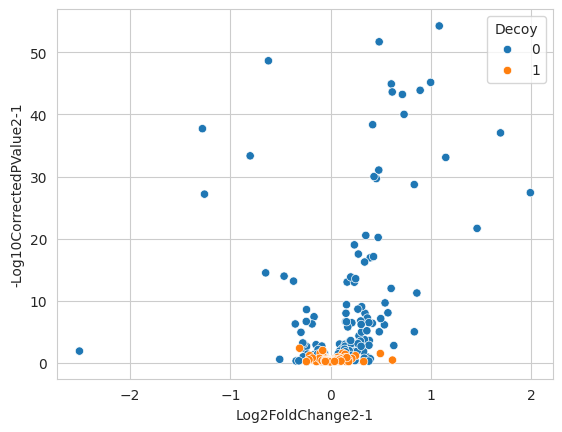

In [17]:
import seaborn as sns


sns.scatterplot(
    data=data,
    x="Log2FoldChange2-1",
    y="-Log10CorrectedPValue2-1",
    hue="Decoy"
)

In [18]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1
0,P00747,0,0.041350,6.446830,6.507135,0.327546,0.281935,-0.060304,1.245620e-02,406,281,2.840887e-02,1.546546,0.003515,208.90
1,P02787,0,0.158730,8.247865,8.412182,0.369758,0.344672,-0.164317,6.481507e-09,406,281,3.663461e-08,7.436108,0.007018,210.60
2,P02675,0,0.038751,8.821600,8.741262,0.556768,0.529081,0.080338,5.855207e-02,406,281,1.079684e-01,0.966703,0.008663,200.25
3,P01024,0,0.166435,8.186332,8.032181,0.339157,0.303353,0.154151,1.736267e-09,406,281,1.019713e-08,7.991522,0.177348,12.50
4,P13671,0,0.072449,5.097814,5.007745,0.330946,0.295200,0.090069,2.734046e-04,406,281,9.113485e-04,3.040316,0.015788,196.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,1,0.246889,4.230972,3.612954,0.619866,0.455231,0.618018,2.728915e-01,4,3,3.478029e-01,0.458667,0.000000,253.75
374,decoy_O95497,1,0.086619,4.378899,4.593944,0.813169,0.647234,-0.215045,2.199682e-01,42,34,3.058381e-01,0.514508,0.000000,253.75
375,decoy_P01767,1,0.042076,7.473542,7.368846,1.084699,1.079595,0.104696,5.284027e-01,110,71,5.126295e-01,0.290196,0.000000,253.75
376,decoy_P30041,1,0.096063,2.442939,2.683534,0.757504,1.038689,-0.240595,7.422468e-01,4,5,6.030755e-01,0.219628,0.000000,253.75


In [19]:
qm_decoys_added = qm_decoys_added.evaluate(
    comparisons=[(2, 1)],
    method="basic"
)

/home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [20]:
qm_decoys_added = qm_decoys_added.annotate()

In [21]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
0,P00747,0,0.041350,6.446830,6.507135,0.327546,0.281935,-0.060304,1.245620e-02,406,281,2.840887e-02,1.546546,0.003515,208.90,2.903849,0.067227,PLG
1,P02787,0,0.158730,8.247865,8.412182,0.369758,0.344672,-0.164317,6.481507e-09,406,281,3.663461e-08,7.436108,0.007018,210.60,8.058449,0.000000,TF
2,P02675,0,0.038751,8.821600,8.741262,0.556768,0.529081,0.080338,5.855207e-02,406,281,1.079684e-01,0.966703,0.008663,200.25,0.594370,0.142857,FGB
3,P01024,0,0.166435,8.186332,8.032181,0.339157,0.303353,0.154151,1.736267e-09,406,281,1.019713e-08,7.991522,0.177348,12.50,8.185647,0.000000,C3
4,P13671,0,0.072449,5.097814,5.007745,0.330946,0.295200,0.090069,2.734046e-04,406,281,9.113485e-04,3.040316,0.015788,196.40,6.874391,0.021277,C6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,1,0.246889,4.230972,3.612954,0.619866,0.455231,0.618018,2.728915e-01,4,3,3.478029e-01,0.458667,0.000000,253.75,3.453994,0.053097,decoy_P04264
374,decoy_O95497,1,0.086619,4.378899,4.593944,0.813169,0.647234,-0.215045,2.199682e-01,42,34,3.058381e-01,0.514508,0.000000,253.75,2.136419,0.076923,decoy_O95497
375,decoy_P01767,1,0.042076,7.473542,7.368846,1.084699,1.079595,0.104696,5.284027e-01,110,71,5.126295e-01,0.290196,0.000000,253.75,-2.338684,0.377358,decoy_P01767
376,decoy_P30041,1,0.096063,2.442939,2.683534,0.757504,1.038689,-0.240595,7.422468e-01,4,5,6.030755e-01,0.219628,0.000000,253.75,-0.169898,0.196629,decoy_P30041


<Axes: xlabel='FeatureScore2-1', ylabel='Count'>

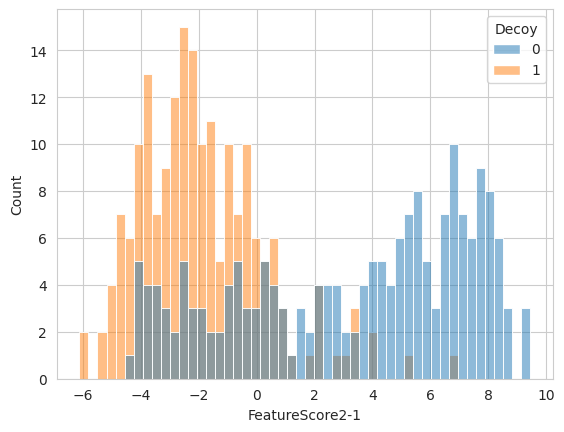

In [22]:
sns.histplot(
    data=qm_decoys_added.row_annotations,
    x="FeatureScore2-1",
    hue="Decoy",
    bins=50
)

In [23]:
qm_decoys_added.row_annotations[qm_decoys_added.row_annotations['FeatureQValue2-1'] < 0.01]

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
1,P02787,0,0.158730,8.247865,8.412182,0.369758,0.344672,-0.164317,6.481507e-09,406,281,3.663461e-08,7.436108,0.007018,210.60,8.058449,0.0,TF
3,P01024,0,0.166435,8.186332,8.032181,0.339157,0.303353,0.154151,1.736267e-09,406,281,1.019713e-08,7.991522,0.177348,12.50,8.185647,0.0,C3
14,P08603,0,0.254156,7.076358,6.910613,0.265093,0.278203,0.165745,1.255210e-14,406,281,9.598664e-14,13.017789,0.074861,53.10,7.188934,0.0,CFH
15,P06727,0,0.206680,6.543327,6.199451,0.712774,0.743033,0.343876,1.764889e-09,406,281,1.019713e-08,7.991522,0.009269,217.90,8.514099,0.0,APOA4
17,P06396,0,0.926185,4.747323,5.366959,0.480055,0.493386,-0.619636,2.741850e-51,405,281,2.376270e-49,48.624104,0.758327,2.10,6.952218,0.0,GSN
21,P07357,0,0.143073,5.680882,5.529732,0.356038,0.344839,0.151149,4.476591e-08,406,281,2.282184e-07,6.641649,0.008204,214.55,9.227420,0.0,C8A
22,P01023,0,0.142756,8.016346,8.200062,0.446069,0.434161,-0.183716,1.152369e-07,406,281,5.313453e-07,6.274623,0.039282,77.10,7.188295,0.0,A2M
42,P00488,0,0.288635,4.571058,4.939966,0.622064,0.551026,-0.368907,8.650951e-15,396,279,6.815901e-14,13.166477,0.101803,34.40,7.250902,0.0,F13A1
43,P00742,0,0.191069,5.239710,5.080098,0.329794,0.275578,0.159612,6.245718e-11,406,280,4.163812e-10,9.380509,0.023434,159.60,8.317203,0.0,F10
44,P69905,0,0.110481,6.172221,6.411250,0.911798,0.890580,-0.239028,6.989979e-04,406,281,2.113249e-03,2.675049,0.013318,167.85,7.392663,0.0,HBA1


In [47]:
qm_decoys_added.row_annotations.sort_values("FeatureScore2-1", ascending=False).head(50)

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
92,P23083,0,0.107150,5.672677,5.459120,0.698606,0.736281,0.213556,2.100396e-04,397,256,7.379770e-04,3.131957,0.196699,167.0,9.353042,0.000000,IGHV1-2
98,A0A0C4DH24,0,0.139144,4.016933,3.718541,0.776340,0.728018,0.298392,8.411243e-05,258,169,3.124176e-04,3.505265,0.698743,12.5,9.216244,0.000000,IGKV6-21
114,P00740,0,0.406254,5.024406,4.672386,0.459826,0.432216,0.352020,2.549860e-22,405,279,3.013471e-21,20.520933,0.671196,6.5,8.872446,0.000000,F9
178,A0A075B6R2,0,0.177384,5.575615,5.212967,0.756201,0.633718,0.362648,1.556332e-06,229,153,6.633546e-06,5.178254,0.146563,206.1,8.510091,0.000000,IGHV4-4
161,P06331,0,0.157870,5.587145,5.278032,0.720866,0.601367,0.309113,2.636440e-06,309,171,1.071054e-05,4.970189,0.132218,231.9,8.483227,0.000000,IGHV4-34
36,P01031,0,0.272688,5.983844,5.782230,0.308657,0.331861,0.201614,1.740141e-15,406,281,1.459473e-14,13.835804,0.116808,240.5,8.221303,0.000000,C5
105,Q9NZP8,0,0.366277,5.117302,4.879196,0.303953,0.319285,0.238106,9.152055e-21,394,267,9.914726e-20,19.003719,0.133655,221.4,8.103316,0.000000,C1RL
22,P01023,0,0.142756,8.016346,8.200062,0.446069,0.434161,-0.183716,1.152369e-07,406,281,5.313453e-07,6.274623,0.612850,13.9,8.067212,0.000000,A2M
5,P10643,0,0.152037,5.818661,5.605823,0.521982,0.474044,0.212838,7.200484e-08,406,281,3.466900e-07,6.460059,0.176918,185.9,7.919826,0.000000,C7
167,P15144,0,0.243584,4.180030,3.678768,0.739760,0.718197,0.501262,1.349342e-08,255,102,7.308934e-08,7.136146,0.473473,33.7,7.859140,0.000000,ANPEP


In [45]:
qm_decoys_added.row_annotations.sort_values("MeanImportance2-1", ascending=False).head(50)

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
17,P06396,0,0.926185,4.747323,5.366959,0.480055,0.493386,-0.619636,2.741850e-51,405,281,2.376270e-49,48.624104,0.988131,1.3,7.620434,0.000000,GSN
74,P04004,0,0.032421,8.417645,8.475486,0.396510,0.358195,-0.057841,5.135215e-02,406,281,9.605439e-02,1.017483,0.750885,4.8,0.955153,0.122581,VTN
98,A0A0C4DH24,0,0.139144,4.016933,3.718541,0.776340,0.728018,0.298392,8.411243e-05,258,169,3.124176e-04,3.505265,0.698743,12.5,9.216244,0.000000,IGKV6-21
114,P00740,0,0.406254,5.024406,4.672386,0.459826,0.432216,0.352020,2.549860e-22,405,279,3.013471e-21,20.520933,0.671196,6.5,8.872446,0.000000,F9
85,P25311,0,0.834484,6.090553,5.474774,0.495584,0.544939,0.615779,6.676586e-46,406,281,2.479875e-44,43.605570,0.663492,6.5,7.671667,0.000000,AZGP1
22,P01023,0,0.142756,8.016346,8.200062,0.446069,0.434161,-0.183716,1.152369e-07,406,281,5.313453e-07,6.274623,0.612850,13.9,8.067212,0.000000,A2M
80,Q15848,0,0.123767,2.984427,3.250621,0.666291,0.981466,-0.266194,2.538219e-04,286,242,8.570611e-04,3.066988,0.553348,16.9,6.673569,0.027027,ADIPOQ
95,A0A075B6I0,0,0.024262,7.386666,7.328140,0.886472,0.927670,0.058527,4.256385e-01,368,259,4.480405e-01,0.348683,0.523471,26.0,-2.656517,0.389286,IGLV8-61
18,P02749,0,0.574301,6.286490,5.829840,0.436776,0.530959,0.456650,1.407941e-31,406,281,2.153321e-30,29.666891,0.493542,29.8,7.195867,0.000000,APOH
340,decoy_Q15166,1,0.023136,6.761426,6.816337,0.522531,0.588615,-0.054910,3.804551e-01,208,123,4.209290e-01,0.375791,0.491513,34.4,2.701191,0.050420,decoy_Q15166
